In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


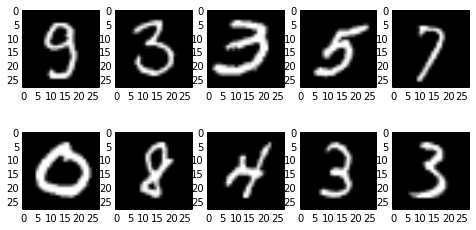

In [2]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (8.0, 4.0)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(mnist.train.images[randint(0,1000)].reshape((28,28)), cmap="gray")

In [3]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [18]:
x = tf.placeholder(tf.float32,[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight_variable([5, 5, 1, 20])
b_conv1 = bias_variable([20])

W_conv2 = weight_variable([5, 5, 20, 30])
b_conv2 = bias_variable([30])

W_fc1 = weight_variable([7 * 7 * 30, 1024])
b_fc1 = bias_variable([1024])


h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*30])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


testPerformance = []
trainPerformance = []

sess = tf.InteractiveSession()
mse = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(mse)

sess.run(tf.initialize_all_variables())

for i in range(1500):
    batch = mnist.train.next_batch(100)
    
    if i%50 == 0:
        testPerformance.append( mse.eval(feed_dict={
            x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        trainPerformance.append(mse.eval(feed_dict={
                x:batch[0], y_: batch[1], keep_prob: 1.0}))
        print "step %d, training losss %g"%(i, trainPerformance[-1])
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})



Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f28a7249f10>> ignored


step 0, training losss 465.355
step 50, training losss 136.307
step 100, training losss 63.3001
step 150, training losss 36.6197
step 200, training losss 46.5471
step 250, training losss 35.6089
step 300, training losss 20.3052
step 350, training losss 26.3612
step 400, training losss 14.6059
step 450, training losss 14.8389
step 500, training losss 21.1926
step 550, training losss 11.9208
step 600, training losss 24.033
step 650, training losss 16.2496
step 700, training losss 17.3231
step 750, training losss 28.2597
step 800, training losss 13.6139
step 850, training losss 19.4756
step 900, training losss 9.41873
step 950, training losss 9.31495
step 1000, training losss 29.1687
step 1050, training losss 8.24356
step 1100, training losss 4.51801
step 1150, training losss 7.68895
step 1200, training losss 10.0659
step 1250, training losss 4.54781
step 1300, training losss 10.4258
step 1350, training losss 13.2456
step 1400, training losss 15.8605
step 1450, training losss 10.4802
step

(10000,)
(10000,)


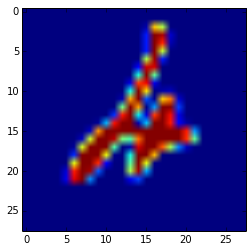

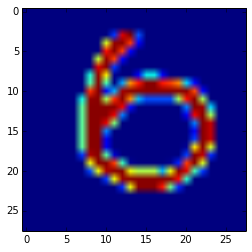

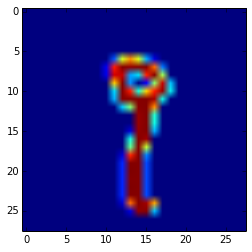

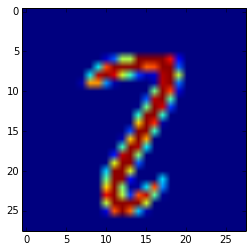

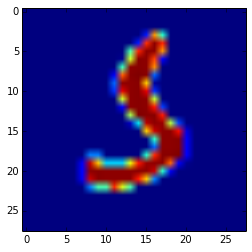

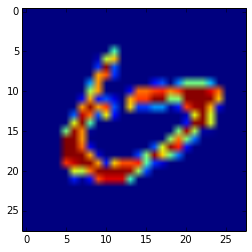

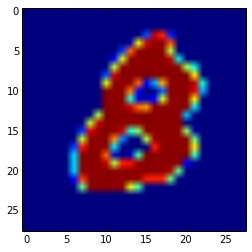

Error on test set: 0.0189


In [19]:
pred = np.argmax(sess.run(y_conv, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}),axis=1)
trueLabels = np.argmax(mnist.test.labels,axis=1)

print trueLabels.shape
print pred.shape

errors = 0.

for i in range(len(trueLabels)):
    if trueLabels[i] != pred[i]:
        if i<500:
            plt.imshow(mnist.test.images[i].reshape((28,28)))
            plt.show()
        errors = errors+1
        
print "Error on test set: "+str(errors/pred.shape[0])        

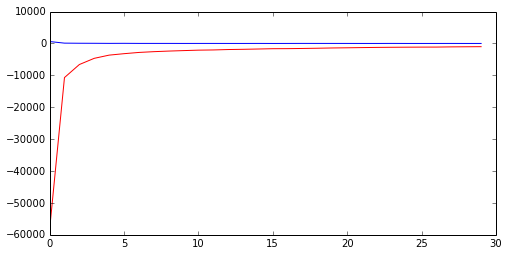

In [12]:
plt.plot(trainPerformance, "b")
plt.plot(np.asarray(testPerformance), "r")
plt.show()

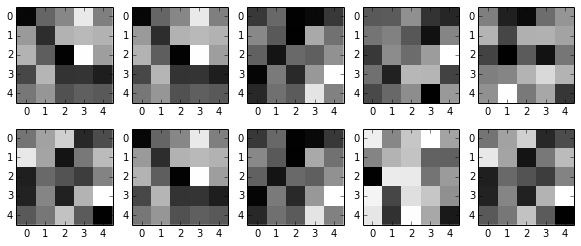

In [8]:
import pylab as pylab
pylab.rcParams['figure.figsize'] = (10.0, 4.0)

fW = sess.run(W_conv1)

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(fW[:,:,:,randint(0,19)]).reshape((5,5)),cmap="gray" ,interpolation="none")

In [9]:
print fW.shape

(5, 5, 1, 20)


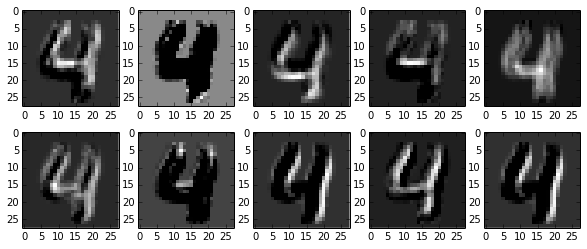

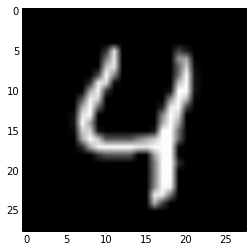

In [11]:
conv1 = sess.run(h_conv1, feed_dict={x: mnist.test.images[4:], y_: mnist.test.labels})[0,:,:,:]

f, axes = plt.subplots(2, 5)

for i in range(10):
    axes.ravel()[i].imshow(np.asarray(conv1[:,:,randint(0,19)]).reshape((28,28)), cmap="gray",interpolation="none")

plt.show()
plt.imshow(mnist.test.images[4].reshape(28,28), cmap="gray")
    